# Spam Detection

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-01-15 21:25:36--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2023-01-15 21:25:36 (7.95 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [8]:
df.columns = ['labels', 'data']

In [9]:
print(df.head())

  labels                                               data
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [10]:
# Create binary labels
df['b_labels'] = df['labels'].map({"ham": 0, "spam": 1})
Y = df['b_labels'].values 

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [12]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [13]:
# get word -> integer mapping
word_index = tokenizer.word_index
V = len(word_index)
print(V)

7257


In [14]:
# Pad sequences to get a N X T matrix
data_train = pad_sequences(sequences_train)
print(data_train.shape)

# Get sequence length
T = data_train.shape[1]

(3733, 189)


In [15]:
# Pad sequences to get a N X T matrix
data_test = pad_sequences(sequences_test, maxlen=T)
print(data_test.shape)

(1839, 189)


In [16]:
from tensorflow.keras import layers

# We get to choose embedding dimensionality
D = 20

# Create the model
i = layers.Input(shape=(T, ))
x = layers.Embedding(V+1, D)(i)
x = layers.LSTM(15, return_sequences=True)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(i, x)

In [17]:
# CNN

# We get to choose embedding dimensionality
D = 20

# Create the model
i = layers.Input(shape=(T, ))
x = layers.Embedding(V+1, D)(i)
x = layers.Conv1D(32, 3, activation="relu")(x)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)  # or Flatten
# x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(i, x)

In [18]:
# Compile and fit
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

r = model.fit(data_train, Ytrain,
              epochs=10,
              validation_data=(data_test, Ytest))

Epoch 1/10
117/117 [==============================] - 15s 111ms/step - loss: 0.3863 - accuracy: 0.8618 - val_loss: 0.2940 - val_accuracy: 0.8624
Epoch 2/10
117/117 [==============================] - 6s 48ms/step - loss: 0.1866 - accuracy: 0.9135 - val_loss: 0.1634 - val_accuracy: 0.9467
Epoch 3/10
117/117 [==============================] - 3s 26ms/step - loss: 0.0521 - accuracy: 0.9839 - val_loss: 0.0863 - val_accuracy: 0.9804
Epoch 4/10
117/117 [==============================] - 3s 27ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.1049 - val_accuracy: 0.9804
Epoch 5/10
117/117 [==============================] - 3s 26ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0746 - val_accuracy: 0.9831
Epoch 6/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0751 - val_accuracy: 0.9859
Epoch 7/10
117/117 [==============================] - 3s 25ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0783 - val_accuracy: 0.98

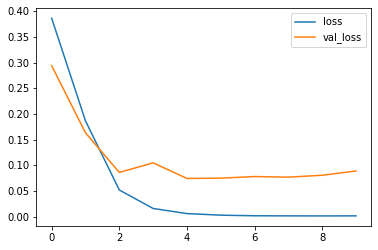

In [19]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

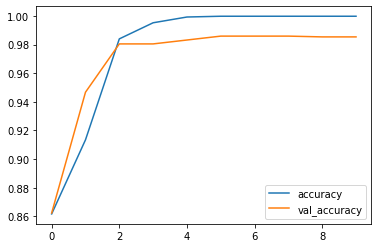

In [20]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()